In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

In [100]:
train_data = pd.read_csv("./DataSets/Train.csv")
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [101]:
round((train_data.isnull().sum()/len(train_data)*100),1)

Item_Identifier               0.0
Item_Weight                  17.2
Item_Fat_Content              0.0
Item_Visibility               0.0
Item_Type                     0.0
Item_MRP                      0.0
Outlet_Identifier             0.0
Outlet_Establishment_Year     0.0
Outlet_Size                  28.3
Outlet_Location_Type          0.0
Outlet_Type                   0.0
Item_Outlet_Sales             0.0
dtype: float64

In [102]:
#missing rows which has missing values
train_data.dropna(axis=0,inplace=True)

In [103]:
train_data.shape

(4650, 12)

In [104]:
round((train_data.isnull().sum()/len(train_data)*100),1)

Item_Identifier              0.0
Item_Weight                  0.0
Item_Fat_Content             0.0
Item_Visibility              0.0
Item_Type                    0.0
Item_MRP                     0.0
Outlet_Identifier            0.0
Outlet_Establishment_Year    0.0
Outlet_Size                  0.0
Outlet_Location_Type         0.0
Outlet_Type                  0.0
Item_Outlet_Sales            0.0
dtype: float64

In [105]:
train_data.Item_Fat_Content.value_counts()

Low Fat    2774
Regular    1575
LF          177
reg          71
low fat      53
Name: Item_Fat_Content, dtype: int64

In [106]:
train_data["Item_Fat_Content"] = train_data.Item_Fat_Content.replace({"Low Fat":"LF","Regular":"reg","low fat":"LF"})

In [107]:
train_data.Item_Fat_Content.value_counts()

LF     3004
reg    1646
Name: Item_Fat_Content, dtype: int64

In [28]:
obj = ["Item_Fat_Content","Outlet_Size","Outlet_Location_Type","Outlet_Type"]

dummies = pd.get_dummies(train_data[obj])
dummies.head()

,Item_Fat_Content_LF,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,1,0,0,1,0,1,0,0,0,1,0,0
1,0,1,0,1,0,0,0,1,0,0,1,0
2,1,0,0,1,0,1,0,0,0,1,0,0
4,1,0,1,0,0,0,0,1,0,1,0,0
5,0,1,0,1,0,0,0,1,0,0,1,0


In [29]:
num = train_data[["Item_Weight","Item_Visibility","Item_MRP","Item_Outlet_Sales"]]
num.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales
0,9.300,0.016047,249.8092,3735.1380
1,5.920,0.019278,48.2692,443.4228
2,17.500,0.016760,141.6180,2097.2700
4,8.930,0.000000,53.8614,994.7052
5,10.395,0.000000,51.4008,556.6088


In [30]:
new_data = pd.concat([num,dummies], axis=1)
new_data.head()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Fat_Content_LF,Item_Fat_Content_reg,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.300,0.016047,249.8092,3735.1380,1,0,0,1,0,1,0,0,0,1,0,0
1,5.920,0.019278,48.2692,443.4228,0,1,0,1,0,0,0,1,0,0,1,0
2,17.500,0.016760,141.6180,2097.2700,1,0,0,1,0,1,0,0,0,1,0,0
4,8.930,0.000000,53.8614,994.7052,1,0,1,0,0,0,0,1,0,1,0,0
5,10.395,0.000000,51.4008,556.6088,0,1,0,1,0,0,0,1,0,0,1,0


In [33]:
new_data.shape

(6113, 16)

In [35]:
X = new_data[new_data.columns.difference(["Item_Outlet_Sales"])]
Y = new_data[["Item_Outlet_Sales"]]

In [36]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

In [37]:
#creating a linear regression object
lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = lin_reg.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  1136.1942332244341
R-Squre:  0.5797732784153924


# regularization

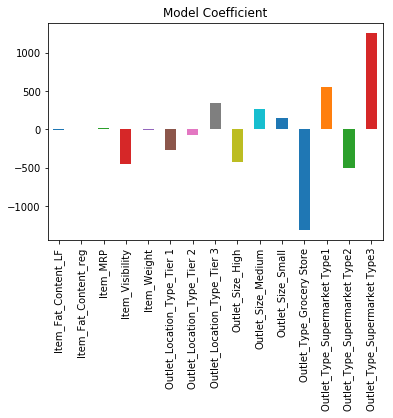

In [78]:
predictors = X_train.columns
coef = [-7.91204531,7.91204531,16.42998172,-448.52166935,-4.44080096,-271.41951109,-73.13854307,344.55805416,-419.80959998,271.74712742,148.06247256,-1314.37703593,550.00938179,-497.95833031,1262.32598444]
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()

# Ridge Regression

In [87]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=0.5,normalize=True)
ridge_regressor.fit(X_train, Y_train)

pred = ridge_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,pred))

r2 = r2_score(Y_test,pred)

print("RMSE:",rmse)
print("R Squre: ",r2)

RMSE: 1214.1056412037867
R Squre:  0.5201655140079047


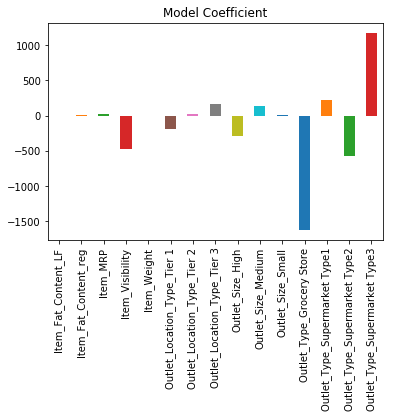

In [83]:
predictors = X_train.columns 
coef = [-8.14345183,8.14345183,16.26692307,-471.74349075,-4.33594464,-186.00001896,20.75813015,168.06027849,-287.48548802,142.58899829,8.15042767,-1625.65986166,214.84810555,-568.79392954,1175.99221515]
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()#0.5795059866109303 for 0.01,0.05 0.577639630301389,

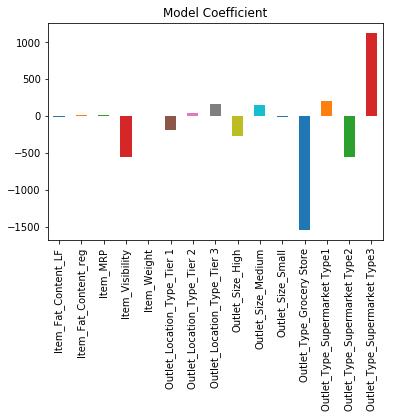

In [86]:
predictors = X_train.columns 
coef = [  -8.97713777,     8.97713777,    15.64556113,  -553.01932361,
           -3.9461494 ,  -189.3434066 ,    45.32445684,   158.54112664,
         -268.7625391 ,   155.05568693,   -14.98755728, -1545.87387684,
          208.14262452,  -557.63928784,  1127.80597076]
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()#0.5795059866109303 for 0.01

In [88]:
ridge_regressor.coef_

array([[  -12.94261917,    12.94261917,    10.93794755,  -888.63504095,
           -1.53880271,  -188.45426227,   118.9022342 ,   119.54870558,
         -157.80116174,   177.8529267 ,   -99.02217663, -1070.52867069,
          149.4043371 ,  -417.38662296,   802.24347509]])

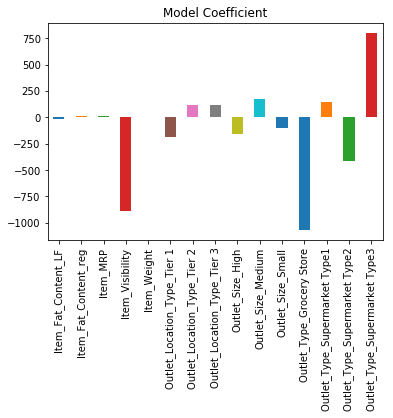

In [89]:
predictors = X_train.columns #for 0.5
coef = [   -12.94261917,    12.94261917,    10.93794755,  -888.63504095,
           -1.53880271,  -188.45426227,   118.9022342 ,   119.54870558,
         -157.80116174,   177.8529267 ,   -99.02217663, -1070.52867069,
          149.4043371 ,  -417.38662296,   802.24347509]
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()

# Lasso Regression

In [98]:
from sklearn.linear_model import Lasso
list1 = []
for i in [0.01,0.05,0.5,0.8]:
    lasso_regressor = Lasso(alpha=i,normalize=True)
    lasso_regressor.fit(X_train, Y_train)

    pred = lasso_regressor.predict(X_test)

    rmse = np.sqrt(mean_squared_error(Y_test,pred))

    r2 = r2_score(Y_test,pred)
    list1.append(r2)

    #print("RMSE:",rmse)
    #print("R Squre: ",r2)

In [99]:
list1

[0.5798597454497992,
 0.5801756512077616,
 0.5809569677721846,
 0.5795559107671258]

In [94]:
#0.5 is increasing so we will use it
lasso_regressor = Lasso(alpha=0.5,normalize=True)
lasso_regressor.fit(X_train, Y_train)

pred = lasso_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,pred))

r2 = r2_score(Y_test,pred)
list1.append(r2)

print("RMSE:",rmse)
print("R Squre: ",r2)

RMSE: 1134.592895942348
R Squre:  0.5809569677721846


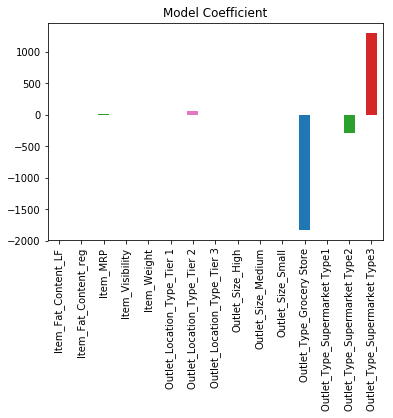

In [97]:
predictors = X_train.columns #for 0.5
coef = [ -0.        ,     0.        ,    15.85179172,    -0.        ,
          -0.        ,    -0.        ,    54.54794237,    -0.        ,
          -0.        ,     0.        ,    -0.        , -1837.48531416,
           0.        ,  -287.3873092 ,  1305.56880461]
coef1 = pd.Series(coef, predictors)
coef1.plot(kind="bar", title = "Model Coefficient")
plt.show()

In [96]:
lasso_regressor.coef_

array([   -0.        ,     0.        ,    15.85179172,    -0.        ,
          -0.        ,    -0.        ,    54.54794237,    -0.        ,
          -0.        ,     0.        ,    -0.        , -1837.48531416,
           0.        ,  -287.3873092 ,  1305.56880461])

# ====================================================

In [108]:
def dum(x):
    if x == "LF":
        return 0
    else:
        return 1

In [109]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [111]:
train_data["New_Fat"] = train_data.Item_Fat_Content.apply(dum)
train_data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,New_Fat
0,FDA15,9.300,LF,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,0
1,DRC01,5.920,reg,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,1
2,FDN15,17.500,LF,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,0
4,NCD19,8.930,LF,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,0
5,FDP36,10.395,reg,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088,1


In [112]:
train_data.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [113]:
def dum_size(x):
    if x == "Medium":
        return 2
    elif x == "High":
        return 1
    else:
        return 3

In [114]:
train_data["New_outlet_size"] = train_data.Outlet_Size.apply(dum_size)

In [115]:
train_data.Outlet_Type.unique()

array(['Supermarket Type1', 'Supermarket Type2'], dtype=object)

In [116]:
def dum_type(x):
    if x == "Supermarket Type1":
        return 1
    else:
        return 2

In [117]:
train_data["New_Outlet_Type"] = train_data.Outlet_Type.apply(dum_type)

In [118]:
train_data.Outlet_Location_Type.unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [119]:
def dum_location(x):
    if x == "Tier 1":
        return 1
    elif x == "Tier 2":
        return 2
    else:
        return 3

In [120]:
train_data["New_Outlet_Location"] = train_data.Outlet_Location_Type.apply(dum_location)

In [121]:
train_data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales', 'New_Fat', 'New_outlet_size',
       'New_Outlet_Type', 'New_Outlet_Location'],
      dtype='object')

In [124]:
X = train_data[["Item_Weight","Item_Visibility","Item_MRP","New_outlet_size","New_Outlet_Type",
               "New_Outlet_Location","New_Fat"]]
Y = train_data[["Item_Outlet_Sales"]]

In [125]:
X.head()

,Item_Weight,Item_Visibility,Item_MRP,New_outlet_size,New_Outlet_Type,New_Outlet_Location,New_Fat
0,9.300,0.016047,249.8092,2,1,1,0
1,5.920,0.019278,48.2692,2,2,3,1
2,17.500,0.016760,141.6180,2,1,1,0
4,8.930,0.000000,53.8614,1,1,3,0
5,10.395,0.000000,51.4008,2,2,3,1


In [127]:
Y.head()

,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
4,994.7052
5,556.6088


In [128]:
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

#creating a linear regression object
lin_reg = LinearRegression()

lin_reg.fit(X_train,Y_train)

#predicting result
y_pred = lin_reg.predict(X_test)

#checking root mean squre error and r squre value
print("RMSE: ",np.sqrt(mean_squared_error(Y_test,y_pred)))
print("R-Squre: ",r2_score(Y_test,y_pred))

RMSE:  1108.4470574986765
R-Squre:  0.4707521759610006


In [129]:
X.shape

(4650, 7)

# Ridge Regression

In [130]:
from sklearn.linear_model import Ridge

ridge_regressor = Ridge(alpha=0.5,normalize=True)
ridge_regressor.fit(X_train, Y_train)

pred = ridge_regressor.predict(X_test)

rmse = np.sqrt(mean_squared_error(Y_test,pred))

r2 = r2_score(Y_test,pred)

print("RMSE:",rmse)
print("R Squre: ",r2)

RMSE: 1169.5397261759483
R Squre:  0.41080489795273323
